### Notebook by [Volkan Sonmez](http://www.pythonicfool.com/)  
### MNIST Dataset is viewed with matplotlib.image library 
### CNN models were built with Pytorch, Tensorflow (TF_Keras) and their performances were compared

####  https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects

## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [EDA and Building ML Models](#EDA_and_Building_ML_Models)
    
4. [Pytorch_Model](#Pytorch_Model)
   
5. [Tensorflow.Keras_Model](#Tensorflow.Keras_Model)

7. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)
    
MNIST dataset can be downloaded from: https://www.kaggle.com/oddrationale/mnist-in-csv  

MNIST is a large dataset of handwritten digits (0 to 9) that is commonly used for training various image processing systems containing 60,000 training images and 10,000 testing images. Each image has 28x28 pixels. 

In this notebook, the MNIST dataset was trained on 2 different packages and their performances were tested. Both models have identical arhitecture. The order for passing the image through model was picked as: 2 x (Conv Layer, Regularization, Max Pool Layer, Activation Function) and then a fully connected layer. The logits of FCL were then passed to the softmax function. The cross-entropy loss was used since this is a multi-class logistic regression problem. 

## License

[[ go back to the top ]](#Table-of-contents)

Please see the [repository README file](https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects) 
for the licenses and usage terms for the instructional material and code in this notebook.

## EDA_and_Building_ML_Model

[[ go back to the top ]](#Table-of-contents)

How to do it: 

The dataset is in .csv format so it is very easy to read it with pandas library. View some of the instances with the matplotlib.pyplot.imshow module. 

Use torch.utils.data.DataLoader module to make iterable batches of training and test sets for the pytorch model. 

Using Pytorch: Write a model by using torch.nn module. Here is a rule of thumb architecture for a very simple model: 2 x (Conv Layer, Regularization, Max Pool Layer, Activation Function) + 1 FCL + Softmax. The optimizer can be chosen Adams and the cross-entropy loss function should be used since this is a multi-class logistic regression problem. With a grid search for the best learning rate or learning rate decay, the accuracy of this model can be improved. For the sake of simplicity, hyper-parameters were not defined but the default values were used both for the optimizer and loss functions in the notebook. 


Using Tensorflow-Keras: Like building pytorch's easy-to-built sequential model, tensorflow has keras module. The same architecture above can be written just with 10 lines of code. 

Compare the results of these two models. 

In [1]:
# Explatory Data Analysis of MNIST and the Machine Learning Modeling of MNIST Dataset with PyTorch and Tf-Keras

# Import the necessary libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Download the MNIST to the same working folder. Load the data.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# View the properties of the data

print(train.shape, test.shape)
print(train.describe())
print(train['label'].head())

(42000, 785) (28000, 784)
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


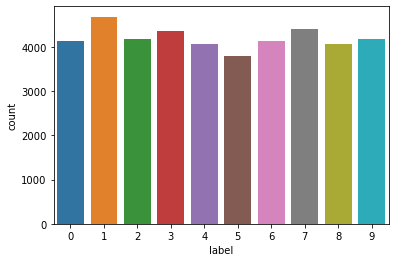

In [4]:
# View the target values in the data

Y_train = train["label"]
X_train = train.drop("label", axis = 1) # all the data except the labels
print(sorted(Y_train.unique()))
sns.countplot(Y_train)

In [5]:
# Turn the dataframe into a numpy array

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(Y_train.shape) # check the shape
print(len(X_train[Y_train == 0])) # view the number of instances represent 0 on the dataset

(42000,)
4132


(784,)


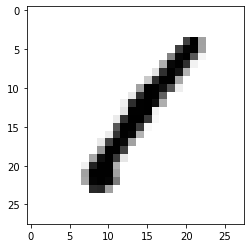

In [6]:
# View a random instance with imshow module.

plt.imshow(X_train[0].reshape(28,28), cmap = plt.cm.binary)
print(X_train[0].shape)

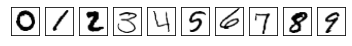

In [7]:
# View a sample instance from all 10 different labels

fig, ax = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True)
for i in range(10):
    img = X_train[Y_train == i][0].reshape(28, 28)
    ax[i].imshow(img,  cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

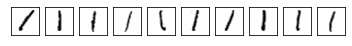

In [8]:
# View the different instances under the same category (target value)

fig, ax = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True,)
for i in range(10):
    img = X_train[Y_train == 1][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

#### End of Explatory Data Analysis and Beginning of the NN model with CNNs ####

## Pytorch_Model

[[ go back to the top ]](#Table-of-contents)

In [9]:
# Using Torch and CNN, here is the NN architecture to develop a ML model that can predict digits with 98% accuracy: 

# Upload the data from torchvision datasets instead of using the dataset downloaded earlier.
# Build this model: input ---> conv1, dropout1, maxpool1, relu1, conv2, dropout2, maxpool2, fcl, softmax ---> output

# Here is the size and shape of each layer and the explanation of the forward propagation:
# 1 x 28 x 28 ---> (1,10) 5x5 conv1 ----> 10 x 24 x 24 -----> dropout----> maxpool1(2,2) ----> 10 x 12 x 12 ----> 
# relu ----> (10,20) 5x5 conv2 ---->  20 x 8 x 8  -----> dropout -----> maxpool2(2,2) ----> 20 x 4 x 4 ----> 
# fcl (320, 10) ----> softmax <----> LOSS & View the results

# Note: Use relu activation function right after maxpools for regularization to achieve best results.

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Download and normalize the training dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', download=True, train=True,
                                                          transform=transforms.Compose([
                                                          transforms.ToTensor(), 
                                                          transforms.Normalize((0.1307,), (0.3081,))
                                                          ])), batch_size=10, shuffle=True)

# Download and normalize the testing dataset
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', download=True, train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), 
                                                              transforms.Normalize((0.1307,), (0.3081,)) 
                                                          ])), batch_size=10, shuffle=True)


device = 'cpu'
class Net(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size = 5) # in , out, kernel size
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size = 5) # in , out, kerner size
        self.fcl1 = torch.nn.Linear(320, 10) # in, out 
        
        
    def forward(self, x):
        x = self.conv1(x)  # input 1 x 28 x 28 ---> (1,10) 5x5 conv1 ----> output 10 x 24 x 24 
        x = torch.nn.functional.dropout(x) # 10 x 24 x 24 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool1(2,2) ----> 10 x 12 x 12 
        x = torch.relu(x) # 10 x 12 x 12 
        x = self.conv2(x) # input 10 x 12 x 12 ----> (10,20) 5x5 conv2 ----> output 20 x 8 x 8 
        x = torch.nn.functional.dropout(x) # 20 x 8 x 8 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool2(2,2) ----> 20 x 4 x 4
        x = torch.relu(x) # 20 x 4 x 4
        x = x.view(-1, 320) # input 20 x 4 x 4 ----> output (1 x 320)
        x = self.fcl1(x) # input (1 x 320)----> output (10)
        x = torch.nn.functional.log_softmax(x, dim = 1) # output softmax of 10 scores 
        return x
        
net = Net().to(device)
optimizer = torch.optim.Adam(net.parameters())
criterion = torch.nn.CrossEntropyLoss()
model_parameters = {}

def train(epoch, save = False):
    net.train() # this is the built-in "train" function of the sequential NN model.
    for ep in range(epoch):
        for idx , (image, label) in enumerate(train_loader): 
            # forward pass
            fwd = net.forward(image)
            # loss
            loss = criterion(fwd, label)
            # print loss
            if idx % 6000 == 0: # each batch is 64 instances
                print('loss is: {}'.format(loss))
                # print('shape of input', image.shape)
            # zero the grads
            optimizer.zero_grad()
            # backward pass
            loss.backward()
            # update the parameters
            optimizer.step()
        if save:
        # save the trained model parameters
            model_parameters = {'model': net.state_dict() , 'optim' : optimizer.state_dict()}
            path = 'model_params{}.pth'.format(ep) # save the model parameters under the current working directory
            torch.save(model_parameters , path)
            print('model parameters is saved: {}'.format(path))
    #test the data
    test()
        
        
def test():
    correct = 0
    test_loss = 0
    net.eval()
    with torch.no_grad():
        for idx , (image, label) in enumerate(test_loader):
            # forward pass
            logit = net(image)
            # calculate loss
            test_loss += criterion(logit, label).sum()
            # compare logit and actual results
            pred_idx = logit.max(1, keepdim = True)[1] # it is the np.argmax on axis = 1
            correct += pred_idx.eq(label.view_as(pred_idx)).sum()
    accuracy = 100 * correct / float(len(test_loader.dataset))
    print('accuracy is: {}'.format(accuracy))
    

        
train(15, save = False) # intentionally overfitted to see the loss value fluctuation



loss is: 2.359494686126709
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.368865042924881
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.49539193511009216
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.008758824318647385
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.055711984634399414
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.03974331170320511
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.0011269596870988607
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.00043945611105300486
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.0005080607370473444
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.005118937697261572
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.000921172380913049
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.013299629092216492
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.06519930064678192
shape of input torch.Size([10, 1, 28, 28])
loss is: 0.025570472702383995
shape of input torch.Size(

## Tensorflow.Keras_Model

[[ go back to the top ]](#Table-of-contents)

In [10]:
# Using TF Keras for the same problem with a pre-fixed 2 fcl architecture for warm up:
# Uploading data from keras datasets instead of using the torchvision dataset

import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/ten

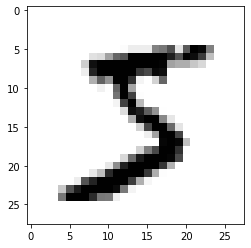

In [11]:
plt.imshow(x_train[0], cmap = plt.cm.binary) # see if it is working

In [12]:
print(x_train.shape) # taking a peek at the shape of the array 
print(x_train[0][10]) # the numbers in the array are between 0-254

(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [13]:
# normalize the array
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [14]:
print(x_train[0][10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0253731  0.00171577 0.22713296
 0.33153488 0.11664776 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [15]:
# INPUT ---> FCL, RELU, FCL, RELU, SOFTMAX ---> OUTPUT
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metris = ['accuracy'])
model.fit(x_train, y_train, epochs = 15) # intentionally overfitted to see the loss value fluctuation

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/15
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2599
Epoch 2/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1029
Epoch 3/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0712
Epoch 4/15
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0516
Epoch 5/15
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0386
Epoch 6/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0316
Epoch 7/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0250
Epoch 8/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0208
Epoch 9/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0162s 
Epoch 10/15
60000/60000 [==============================] - 8s 136us/sample - loss

In [16]:
print(model.evaluate(x_test, y_test, verbose = 1)) # view the loss

10000/10000 [==============================] - 1s 54us/sample - loss: 0.1360
0.13598931129725503


In [17]:
test_results = np.array(model.predict(x_test))
test_labels = np.array(y_test)
test_results = np.argmax(test_results, axis = 1)
assert (len(test_results == test_labels))

In [18]:
# calculate accuracy
print(np.mean(test_results[:] == test_labels[:])) # This model is missing the maxpool layers. Let's add them.

0.9761


In [19]:
# Now, it is time to build a good convolutional network with Keras. Like the one built with pytorch above
# Here is the original code at Keras for MNIST:
# https://keras.io/examples/vision/mnist_convnet/  

from tensorflow import keras
from tensorflow.keras import layers
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 45s 831us/sample - loss: 0.3607 - acc: 0.8900 - val_loss: 0.0864 - val_acc: 0.9775
Epoch 2/15
54000/54000 [==============================] - 46s 860us/sample - loss: 0.1149 - acc: 0.9650 - val_loss: 0.0582 - val_acc: 0.9853
Epoch 3/15
54000/54000 [==============================] - 49s 909us/sample - loss: 0.0868 - acc: 0.9732 - val_loss: 0.0496 - val_acc: 0.9875
Epoch 4/15
54000/54000 [==============================] - 41s 757us/sample - loss: 0.0725 - acc: 0.9776 - val_loss: 0.0426 - val_acc: 0.9892
Epoch 5/15
54000/54000 [==============================] - 46s 851us/sample - loss: 0.0649 - acc: 0.9801 - val_loss: 0.0389 - val_acc: 0.9902
Epoch 6/15
54000/54000 [==============================] - 44s 811us/sample - loss: 0.0555 - acc: 0.9831 - val_loss: 0.0365 - val_acc: 0.9898
Epoch 7/15
54000/54000 [==============================] - 36s 664us/sample - loss: 0.0507 - acc: 0.9842 -

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# save the model if needed
# model.save('mnist_2nn_keras')
# create a new model with the saved model 
# new_model = tf.keras.models.load_model('mnist_2nn_keras')

Test loss: 0.023373040785791818
Test accuracy: 0.9915


## Conclusion

[[ go back to the top ]](#Table-of-contents)

Both models built with pytorch and tensorflow-keras, have around 98-99 percent accuracy for the MNIST dataset. Tuning the hyper-parameters would yield even better results. 